### combo mutant analysis

 * residue frequency
 

In [1]:
from utils import import_igaba_pkl
import numpy as np
import pandas as pd

nAP='40'
data = import_igaba_pkl(nAP, 'responsivepx-segmented-csvs', omit_min_px=1800) # 'ilastik-segmented-csvs' or 'responsivepx-segmented-csvs'


Loading: data\responsivepx-segmented-csvs\good-40AP-all-omit_min_px=1800.pkl


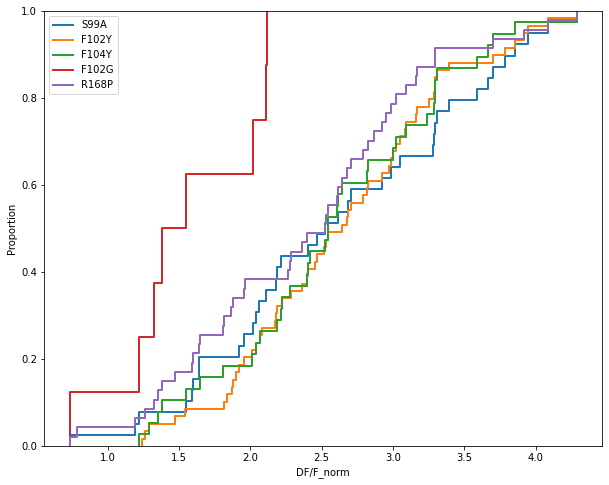

In [3]:
import seaborn as sns
'''
frequency of top mutations
'''

import seaborn as sns
import matplotlib.pyplot as plt

var_to_plot = 'DF/F_norm'

# single mutations
data_combos = data[data['is_combo_int'] == 1].copy()

# get all single mutations performed
data_combos['mutation list'] = data_combos.index.str.split(" ").values

# all mutations
all_mutations = ['S99A', 'F102Y', 'F104Y', 'F102G', 'R168P', 'L178S']# np.unique(data['mutation list'].sum()) ## ONLY EVERY 2ND ONE --DEBUGGING

# var_with_mutation = [1 for row in data.iter() if ('F102G' in row['mutation list'])]
f,axs = plt.subplots( figsize=(10,8))
i=0
for m in all_mutations:
    
    # all constructs having the mutation
    d = data_combos[data_combos['mutation list'].apply(lambda x: any(m in x_sub for x_sub in x))][var_to_plot]
    d = d[d>0]
    if not d.size == 0:
        sns.ecdfplot(x=d, linewidth=2)
    i=i+1
plt.legend(all_mutations)

In [56]:
data_combos

,SNR_norm,SNR_pval_1,SNR_pval_2,SNR_unnorm,DF/F_norm,DF/F_pval_1,DF/F_pval 2,DF/F_unnorm,F0_norm,F0_pval_1,...,num_wells,plate_ids,construct_ids,orig_letter,new_letter,pos,n_mutations,is_combo_int,negative-going,mutation list
mutation_str,,,,,,,,,,,,,,,,,,,,,
F102Y F104H L178R,0.942415,1.000000e+00,3.021598e-17,0.959688,2.449795,4.741291e-254,9.482581e-254,0.867286,0.345095,1.000000e+00,...,12,"[20200825_iGABASnFR/P1a-20200810_iGABASnFR, 20...","[514.4005, 514.4005, 514.4005]","[F, F, L]","[Y, H, R]","[102, 104, 178]",3,1,0,"[F102Y, F104H, L178R]"
F102Y F104H L178S,1.113766,5.812366e-73,1.162473e-72,1.277741,2.529649,0.000000e+00,0.000000e+00,0.966187,0.454945,1.000000e+00,...,12,"[20200929_iGABASnFR/P1a-20200914_iGABASnFR, 20...","[514.4412, 514.4412, 514.4412]","[F, F, L]","[Y, H, S]","[102, 104, 178]",3,1,0,"[F102Y, F104H, L178S]"
F102Y F104H R168P,1.130862,4.089152e-160,8.178304e-160,1.350610,-0.930253,1.000000e+00,0.000000e+00,-0.347505,1.167923,1.637809e-78,...,8,"[20200929_iGABASnFR/P3a-20200914_iGABASnFR, 20...","[514.4457, 514.4457]","[F, F, R]","[Y, H, P]","[102, 104, 168]",3,1,1,"[F102Y, F104H, R168P]"
F102Y F104H R168P L178S,1.078182,1.325672e-69,2.651344e-69,1.205795,-1.228266,1.000000e+00,0.000000e+00,-0.420038,0.860645,1.000000e+00,...,4,[20200929_iGABASnFR/P4a-20200914_iGABASnFR],[514.4442],"[F, F, R, L]","[Y, H, P, S]","[102, 104, 168, 178]",4,1,1,"[F102Y, F104H, R168P, L178S]"
F102Y F104Y,1.017671,4.850703e-01,5.171619e-04,1.096187,1.293419,7.568187e-32,1.513637e-31,0.454813,0.773689,1.000000e+00,...,16,"[20200922_iGABASnFR/P9a-20200907_iGABASnFR, 20...","[514.4180, 514.4180, 514.4180, 514.4180]","[F, F]","[Y, Y]","[102, 104]",2,1,0,"[F102Y, F104Y]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S99G F104Y R168P L178S,0.836918,1.000000e+00,4.104457e-243,0.940298,-0.900880,1.000000e+00,0.000000e+00,-0.344972,0.721778,1.000000e+00,...,4,[20201027_iGABASnFR/P5a-20201012_iGABASnFR],[514.4212],"[S, F, R, L]","[G, Y, P, S]","[99, 104, 168, 178]",4,1,1,"[S99G, F104Y, R168P, L178S]"
S99G L178R,0.985948,9.994833e-01,1.033480e-03,1.073401,2.292478,0.000000e+00,0.000000e+00,0.789338,0.328439,1.000000e+00,...,4,[20200901_iGABASnFR/P9a-20200817_iGABASnFR],[514.3993],"[S, L]","[G, R]","[99, 178]",2,1,0,"[S99G, L178R]"
S99G L178S,1.065836,4.286741e-35,8.573482e-35,1.105513,1.861650,0.000000e+00,0.000000e+00,0.607996,0.434457,1.000000e+00,...,20,"[20201027_iGABASnFR/P1a-20201012_iGABASnFR, 20...","[514.4148, 514.4148, 514.4148, 514.4148, 514.4...","[S, L]","[G, S]","[99, 178]",2,1,0,"[S99G, L178S]"
